In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Для відображення графіків у Jupyter Notebook
%matplotlib inline


In [9]:
# Завантаження даних
df = pd.read_csv("incident_reports.csv", parse_dates=["date"])

# Перегляд перших 5 рядків
print(df.head())

# Перевірка загальної інформації про датафрейм
print(df.info())


ValueError: Missing column provided to 'parse_dates': 'date'

In [10]:
df = pd.read_csv("incident_reports.csv")
df.columns = df.columns.str.strip()  # прибираємо зайві пробіли
print(df.columns.tolist())  # перевірка назв

# Тепер можна парсити дати
df["date"] = pd.to_datetime(df["date"])


['date\tregion\tincident_type\tpriority\tpersonnel_involved']


KeyError: 'date'

In [11]:
df = pd.read_csv("incident_reports.csv", sep="\t", parse_dates=["date"])


In [12]:
print(df.columns.tolist())  # Має вивести: ['date', 'region', 'incident_type', 'priority', 'personnel_involved']
print(df.head())            # Перевірка перших рядків


['date', 'region', 'incident_type', 'priority', 'personnel_involved']
        date   region          incident_type   priority  personnel_involved
0 2025-06-28   Північ  Технічна несправність    Низький                   4
1 2025-06-06  Південь      Порушення зв'язку    Низький                  23
2 2025-06-25  Південь      Порушення зв'язку   Середній                  19
3 2025-06-24  Південь             Кібератака  Критичний                  14
4 2025-06-09    Захід  Технічна несправність    Низький                  16


In [13]:
incident_counts = df["incident_type"].value_counts()
print("Кількість інцидентів за типами:\n", incident_counts)


Кількість інцидентів за типами:
 incident_type
Порушення зв'язку        33
Кібератака               31
Діяльність ДРГ           24
Технічна несправність    22
Логістичний збій         10
Name: count, dtype: int64


In [14]:
region_counts = df["region"].value_counts()
most_incidents_region = region_counts.idxmax()
print(f"Регіон з найбільшою кількістю інцидентів: {most_incidents_region}")


Регіон з найбільшою кількістю інцидентів: Схід


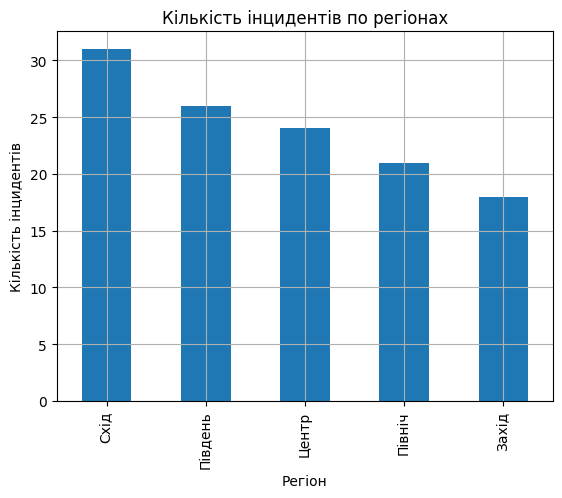

In [15]:
region_counts.plot(kind='bar')
plt.title("Кількість інцидентів по регіонах")
plt.xlabel("Регіон")
plt.ylabel("Кількість інцидентів")
plt.grid(True)
plt.show()


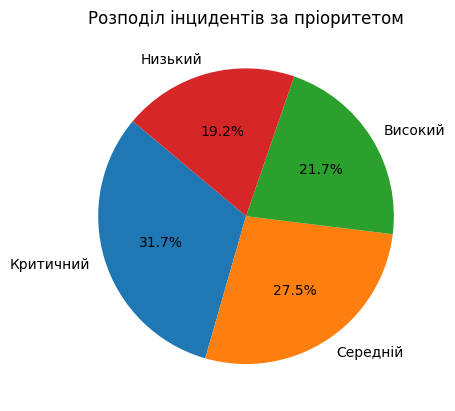

In [16]:
priority_counts = df["priority"].value_counts()
priority_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Розподіл інцидентів за пріоритетом")
plt.ylabel("")  # Щоб прибрати підпис осі Y
plt.show()


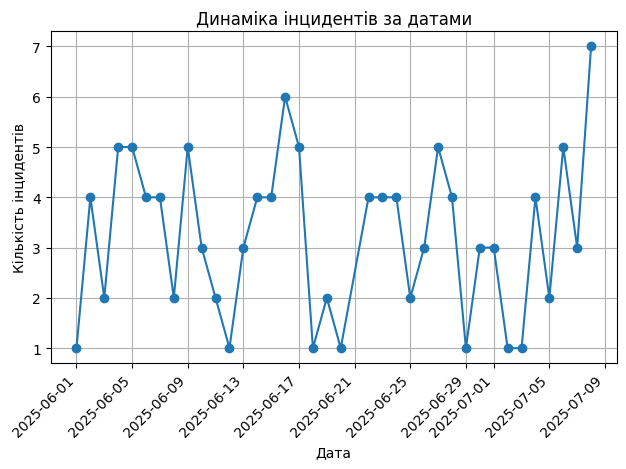

In [17]:
# Групування за датою
date_counts = df["date"].value_counts().sort_index()
date_counts.plot(kind='line', marker='o')
plt.title("Динаміка інцидентів за датами")
plt.xlabel("Дата")
plt.ylabel("Кількість інцидентів")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Висновки:


- Найбільше інцидентів зафіксовано в регіоні **Схід**.
- Більшість інцидентів мають **низький пріоритет**, хоча є й критичні випадки.
- Спостерігається **помітне зростання інцидентів на початку місяця**, що може свідчити про сезонність або сплеск активності.


Назви колонок: ['date', 'region', 'incident_type', 'priority', 'personnel_involved']
Перші 5 рядків:
         date   region          incident_type   priority  personnel_involved
0 2025-06-28   Північ  Технічна несправність    Низький                   4
1 2025-06-06  Південь      Порушення зв'язку    Низький                  23
2 2025-06-25  Південь      Порушення зв'язку   Середній                  19
3 2025-06-24  Південь             Кібератака  Критичний                  14
4 2025-06-09    Захід  Технічна несправність    Низький                  16

Загальна інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                120 non-null    datetime64[ns]
 1   region              120 non-null    object        
 2   incident_type       120 non-null    object        
 3   priority            120 non-nul

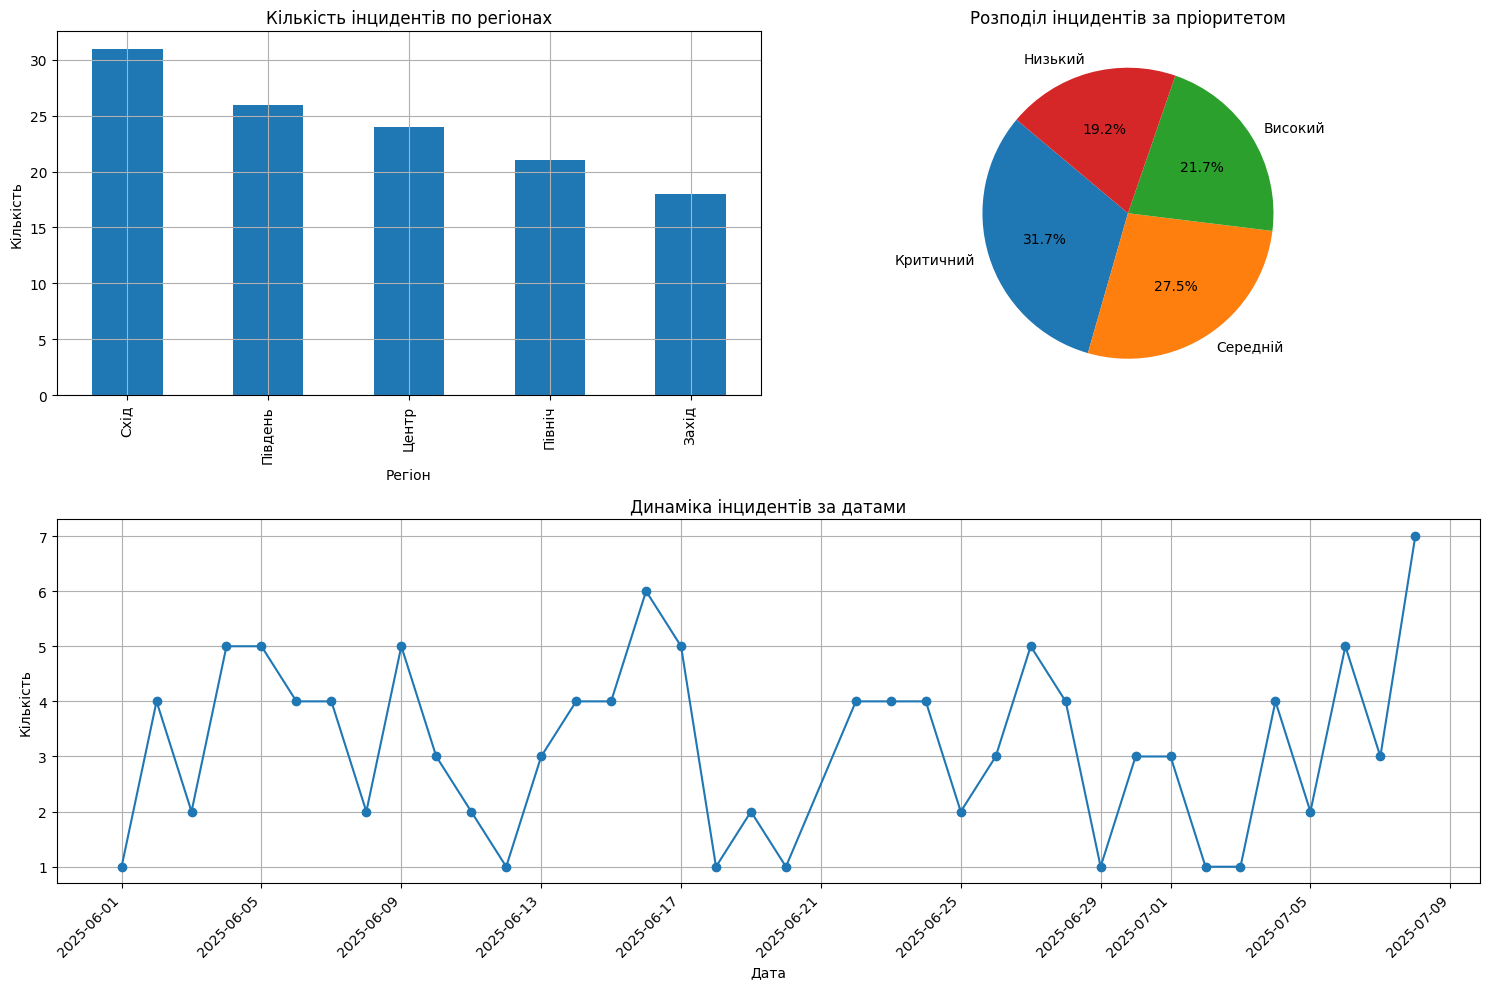

In [18]:
# КРОК 1: Імпорт бібліотек
import pandas as pd
import matplotlib.pyplot as plt

# КРОК 2: Завантаження даних
df = pd.read_csv("incident_reports.csv", sep="\t", parse_dates=["date"])

# КРОК 3: Перевірка
print("Назви колонок:", df.columns.tolist())
print("Перші 5 рядків:\n", df.head())
print("\nЗагальна інформація:")
print(df.info())

# КРОК 4: Аналітика
incident_by_type = df["incident_type"].value_counts()
region_with_most_incidents = df["region"].value_counts().idxmax()
priority_counts = df["priority"].value_counts()
incidents_by_region = df["region"].value_counts()
incidents_by_date = df["date"].value_counts().sort_index()

# КРОК 5: Візуалізація на одному полотні
plt.figure(figsize=(15, 10))

# 5.1 Стовпчаста діаграма по регіонах
plt.subplot(2, 2, 1)
incidents_by_region.plot(kind="bar")
plt.title("Кількість інцидентів по регіонах")
plt.xlabel("Регіон")
plt.ylabel("Кількість")
plt.grid(True)

# 5.2 Кругова діаграма за пріоритетом
plt.subplot(2, 2, 2)
priority_counts.plot(kind="pie", autopct='%1.1f%%', startangle=140)
plt.title("Розподіл інцидентів за пріоритетом")
plt.ylabel("")

# 5.3 Лінійна динаміка по датах
plt.subplot(2, 1, 2)
incidents_by_date.plot(kind="line", marker='o')
plt.title("Динаміка інцидентів за датами")
plt.xlabel("Дата")
plt.ylabel("Кількість")
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
